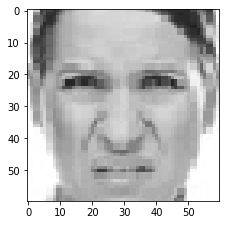

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

#importing deep learning libraries 
from keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential


picture_size=60
folder_path="../input/facial-expression-recognition/"
expression='disgust'
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,1)
    img=load_img(folder_path+"train/"+expression+"/"+os.listdir(folder_path+"train/"+expression)[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show()





In [2]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()
train_set=datagen_train.flow_from_directory(folder_path+"train",target_size=(picture_size,picture_size),color_mode="grayscale",batch_size=batch_size,class_mode='categorical',shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"test",target_size=(picture_size,picture_size),color_mode="grayscale",batch_size=batch_size,class_mode='categorical',shuffle=False)


Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
#Model buildings 


model=Sequential()
no_of_classes=7

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))




model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




2022-04-06 06:45:15.608297: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [4]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-04-06 06:45:16.419022: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/48
224/224 [==============================] - 768s 3s/step - loss: 1.7344 - accuracy: 0.3409 - val_loss: 1.7290 - val_accuracy: 0.3174
Epoch 2/48
224/224 [==============================] - 758s 3s/step - loss: 1.3625 - accuracy: 0.4802 - val_loss: 1.4824 - val_accuracy: 0.4390
Epoch 3/48
224/224 [==============================] - 764s 3s/step - loss: 1.2247 - accuracy: 0.5339 - val_loss: 1.2788 - val_accuracy: 0.5234
Epoch 4/48
224/224 [==============================] - 757s 3s/step - loss: 1.1370 - accuracy: 0.5695 - val_loss: 1.5113 - val_accuracy: 0.4538
Epoch 5/48
224/224 [==============================] - 766s 3s/step - loss: 1.0722 - accuracy: 0.5931 - val_loss: 1.1841 - val_accuracy: 0.5525
Epoch 6/48
224/224 [==============================] - 755s 3s/step - loss: 1.0095 - accuracy: 0.6181 - val_loss: 1.1059 - val_accuracy: 0.5958
Epoch 7/48
224/224 [==============================] - 765s 3s/step - loss: 0.9469 - accuracy: 0.6430 - val_loss: 1.1570 - val_accuracy: 0.5896

In [5]:
model.save_weights('/kaggle/working/final_model.h5')
